In [1]:
import netCDF4
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Define the file pattern
file_pattern = 'NEE_????_025_daily_subset.nc'

# Open the files using xarray's open_mfdataset(combine='nested'?)
ds= xr.open_mfdataset(file_pattern, combine='nested')

# Print the dataset information
ds.compute()

<xarray.Dataset>
Dimensions:        (lat: 2, lon: 2, time: 7670, hour: 24, nbnds: 2)
Coordinates:
  * lat            (lat) float64 46.13 45.88
  * lon            (lon) float64 -90.38 -90.12
  * time           (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2021-12-31
    hour_bnds      (hour, nbnds) int64 0 1 1 2 2 3 3 4 ... 21 21 22 22 23 23 24
    lat_bnds       (lat, nbnds) float64 46.25 46.0 46.0 45.75
    lon_bnds       (lon, nbnds) float64 -90.5 -90.25 -90.25 -90.0
Dimensions without coordinates: hour, nbnds
Data variables:
    NEE            (time, lat, lon) float32 0.499 0.588 0.526 ... 0.7707 0.7396
    land_fraction  (lat, lon) float64 1.0 1.0 1.0 1.0
Attributes: (12/29)
    contact:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    contributor:                ['Jacob Nelson https://orcid.org/0000-0002-46...
    conventions:                CF-1.8
    creation_date:              2023-11-09
    creator:                    The FLUXCOM-X team, fluxcomx@bgc-jena.mpg.de
    crs:                        WGS 84 / Plate Carree
    ...                         ...
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        2001-01-01T00:00:00.000000000
    training_features:          ['TA', 'VPD', 'SW_IN', 'SW_IN_POT', 'dSW_IN_P...
    summary:                    X-BASE NEE is based on the FLUXCOM-X framewor...
    Full_resolution_data:       Visit the dataset documentation at https://gi...
    data_access_url:            https://gitlab.gwdg.de/fluxcom/fluxcomxdata

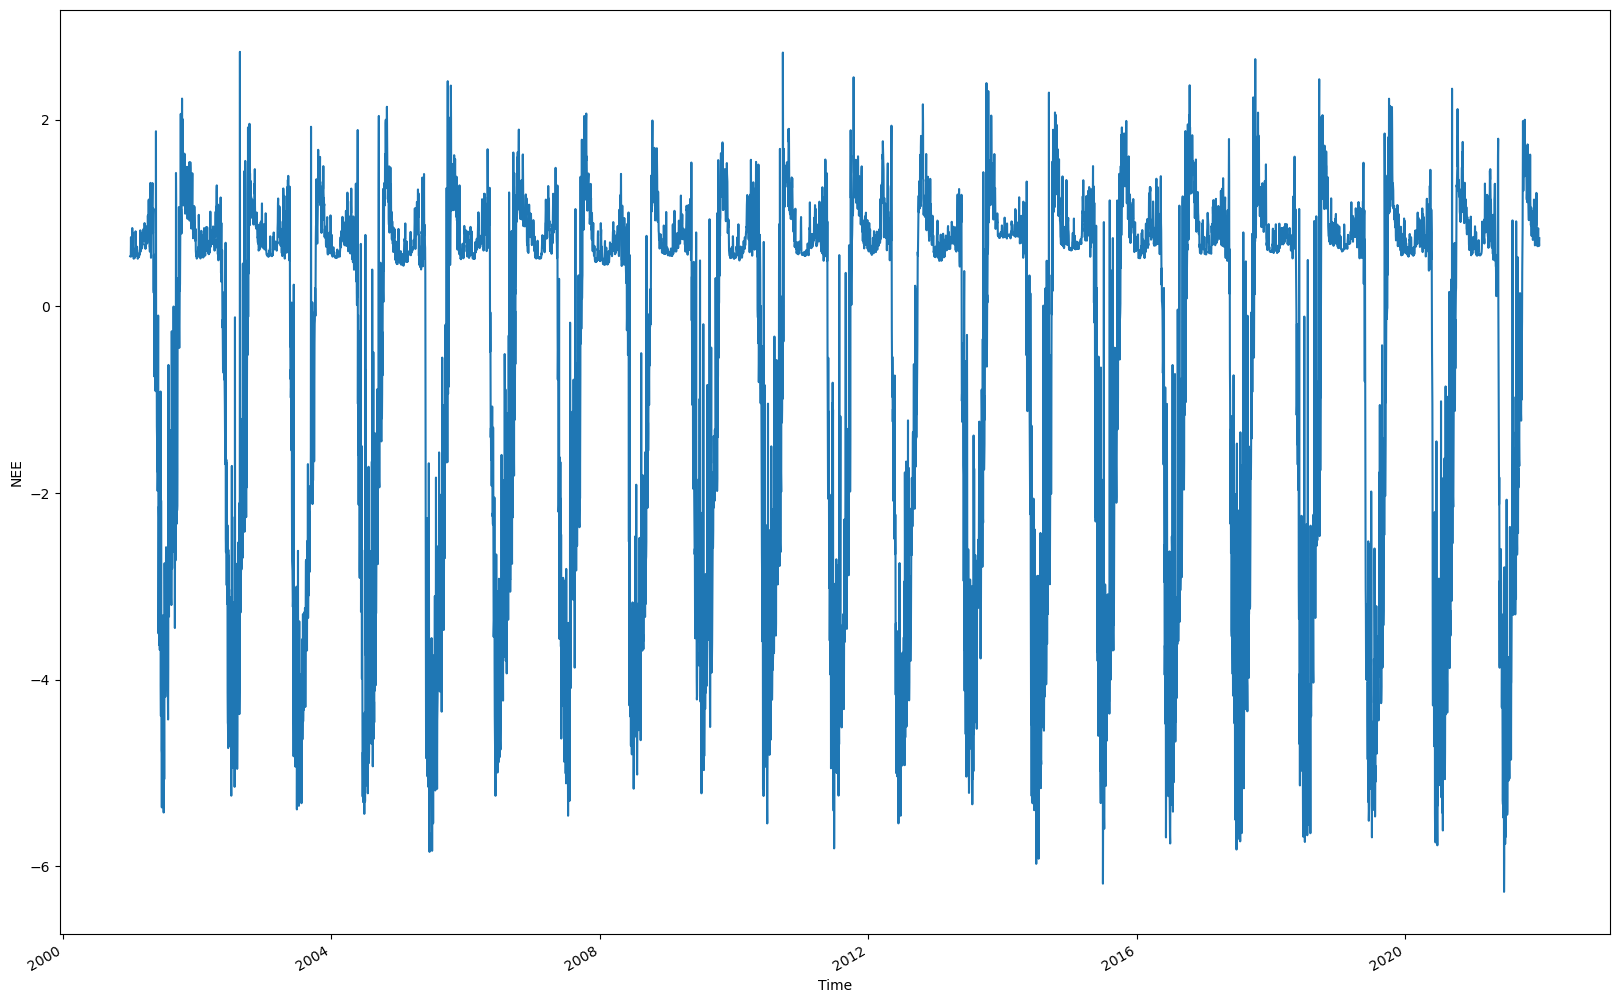

In [3]:
plt.figure(figsize=(20,12))
ds['NEE'].mean(dim=['lat', 'lon']).plot()

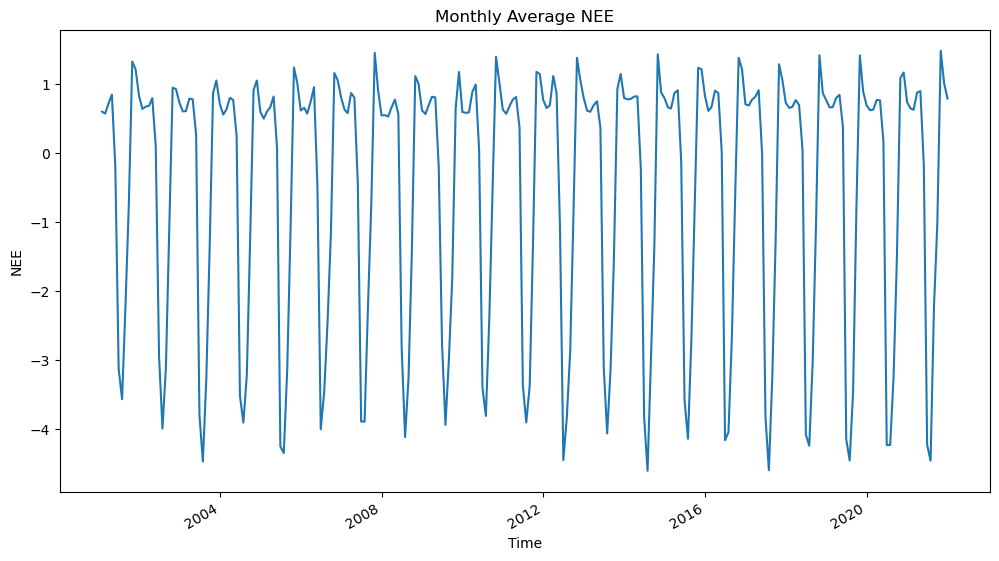

In [4]:
# Aggregate data to monthly averages
monthly_mean = ds['NEE'].mean(dim=['lat', 'lon']).resample(time='1M').mean()

# Plot the monthly averages
plt.figure(figsize=(12, 6))
monthly_mean.plot()
plt.title('Monthly Average NEE')
plt.xlabel('Time')
plt.ylabel('NEE')
plt.show()

In [5]:
import plotly.express as px
# Convert xarray DataArray to pandas DataFrame
df = ds['NEE'].mean(dim=['lat', 'lon']).to_dataframe()

# Plot interactive line plot using Plotly
fig = px.line(df, x=df.index, y='NEE', title='NEE over Time')
fig.show()

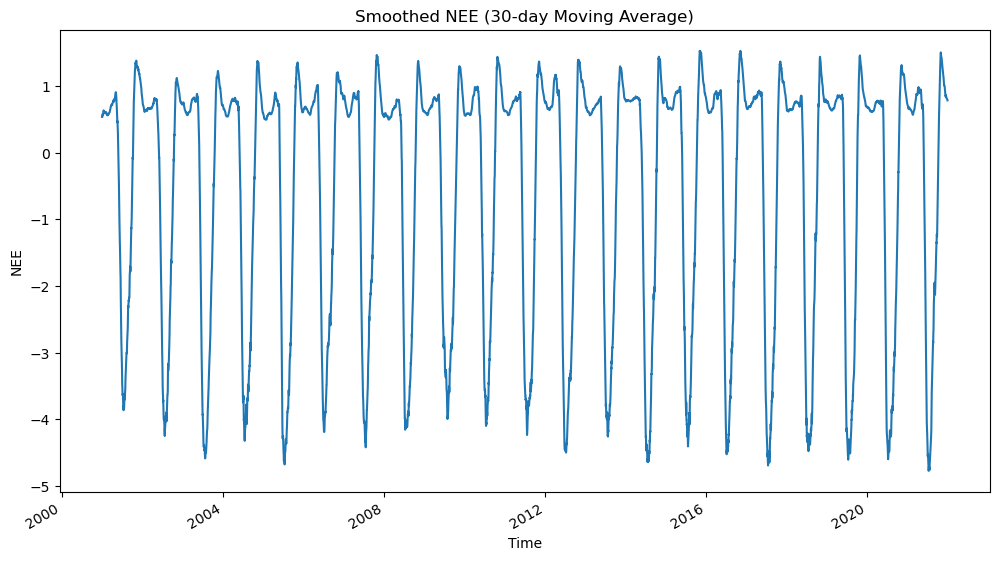

In [6]:
# Apply a 30-day moving average to smooth the data
smoothed_nee = ds['NEE'].mean(dim=['lat', 'lon']).rolling(time=30, min_periods=1).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
smoothed_nee.plot()
plt.title('Smoothed NEE (30-day Moving Average)')
plt.xlabel('Time')
plt.ylabel('NEE')
plt.show()

In [7]:
# Dataframe containing 
fluxcom_NEE= ds['NEE'].mean(dim=['lat', 'lon']).to_pandas().to_frame('NEE_Fluxcom_Mean')
fluxcom_NEE['NEE_Fluxcom_Std']= ds['NEE'].std(dim=['lat', 'lon']).to_pandas()
fluxcom_NEE

NEE_Fluxcom_Mean  NEE_Fluxcom_Std
time                                         
2001-01-01          0.535896         0.032389
2001-01-02          0.534414         0.029303
2001-01-03          0.532226         0.032866
2001-01-04          0.542712         0.027485
2001-01-05          0.741287         0.032827
...                      ...              ...
2021-12-27          0.727599         0.041631
2021-12-28          0.685764         0.046951
2021-12-29          0.692232         0.044501
2021-12-30          0.647944         0.026612
2021-12-31          0.729792         0.036029

[7670 rows x 2 columns]

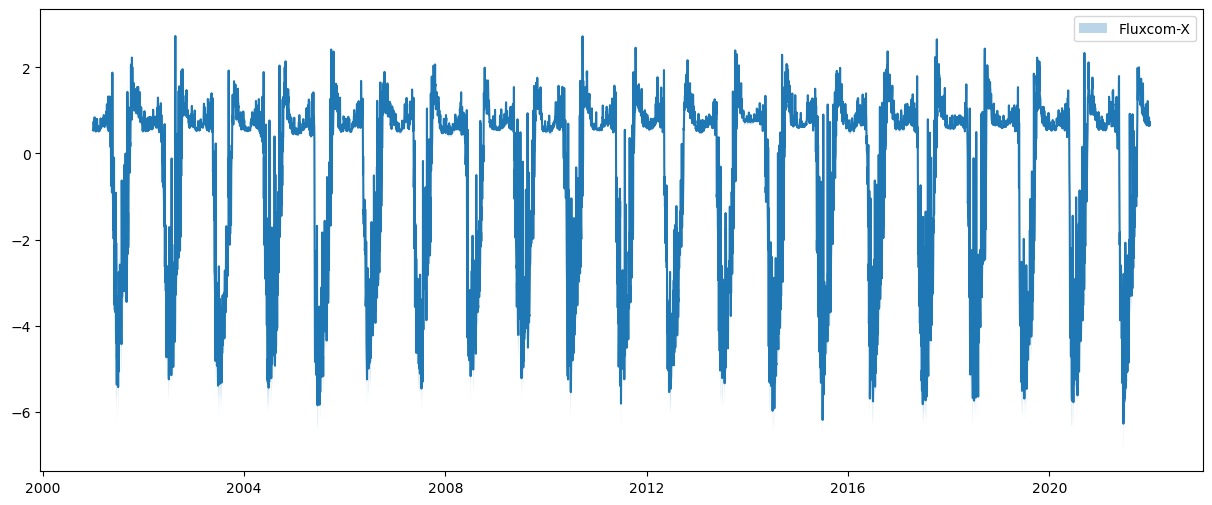

In [8]:
fluxcom_NEE.index = pd.date_range(start='1/1/2001', end='12/31/2021', freq='D') #adjust per requirements
f, ax = plt.subplots(figsize=(15, 6))
plt.plot(fluxcom_NEE.index, fluxcom_NEE['NEE_Fluxcom_Mean'])
plt.fill_between(fluxcom_NEE.index, 
                 fluxcom_NEE['NEE_Fluxcom_Mean'] - fluxcom_NEE['NEE_Fluxcom_Std'], 
                 fluxcom_NEE['NEE_Fluxcom_Mean'] + fluxcom_NEE['NEE_Fluxcom_Std'], 
                 alpha=0.3,
                 label='Fluxcom-X')
#plt.xlim(pd.to_datetime("2021-01-01"), pd.to_datetime("2021-12-31"))
plt.grid(False)
plt.legend()

In [30]:
tall_twr= pd.read_csv("AMF_US-PFa_BASE_HR_26-5.csv", skiprows=2)
tall_twr

TIMESTAMP_START  TIMESTAMP_END  CO2_1_1_1  CO2_1_2_1  CO2_1_3_1  \
0          199501010000   199501010100      365.9      367.4      368.5   
1          199501010100   199501010200      366.3      367.7      368.4   
2          199501010200   199501010300      366.4      367.8      368.4   
3          199501010300   199501010400      366.1      368.3      369.4   
4          199501010400   199501010500      366.5      368.4      369.0   
...                 ...            ...        ...        ...        ...   
252763     202311011900   202311012000    -9999.0    -9999.0    -9999.0   
252764     202311012000   202311012100    -9999.0    -9999.0    -9999.0   
252765     202311012100   202311012200    -9999.0    -9999.0    -9999.0   
252766     202311012200   202311012300    -9999.0    -9999.0    -9999.0   
252767     202311012300   202311020000    -9999.0    -9999.0    -9999.0   

          H2O_1_1_1    H2O_1_2_1    H2O_1_3_1  H2O_PI_F_1_3_1  CH4_1_1_1  ...  \
0          0.621332     0.639972     0.639972        0.639972    -9999.0  ...   
1          0.621332     0.658612     0.671039        0.671039    -9999.0  ...   
2          0.596479     0.658612     0.677252        0.677252    -9999.0  ...   
3          0.590266     0.633759     0.658612        0.658612    -9999.0  ...   
4          0.577839     0.621332     0.646186        0.646186    -9999.0  ...   
...             ...          ...          ...             ...        ...  ...   
252763 -9999.000000 -9999.000000 -9999.000000    -9999.000000    -9999.0  ...   
252764 -9999.000000 -9999.000000 -9999.000000    -9999.000000    -9999.0  ...   
252765 -9999.000000 -9999.000000 -9999.000000    -9999.000000    -9999.0  ...   
252766 -9999.000000 -9999.000000 -9999.000000    -9999.000000    -9999.0  ...   
252767 -9999.000000 -9999.000000 -9999.000000    -9999.000000    -9999.0  ...   

        SWC_2_9_1  TS_1_1_1  TS_1_2_1  TS_1_3_1  TS_1_4_1  TS_1_5_1  TS_1_6_1  \
0         -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
1         -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
2         -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
3         -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
4         -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
...           ...       ...       ...       ...       ...       ...       ...   
252763    -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
252764    -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
252765    -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
252766    -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
252767    -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   

        TS_1_7_1  TS_1_8_1  TS_1_9_1  
0        -9999.0   -9999.0   -9999.0  
1        -9999.0   -9999.0   -9999.0  
2        -9999.0   -9999.0   -9999.0  
3        -9999.0   -9999.0   -9999.0  
4        -9999.0   -9999.0   -9999.0  
...          ...       ...       ...  
252763   -9999.0   -9999.0   -9999.0  
252764   -9999.0   -9999.0   -9999.0  
252765   -9999.0   -9999.0   -9999.0  
252766   -9999.0   -9999.0   -9999.0  
252767   -9999.0   -9999.0   -9999.0  

[252768 rows x 81 columns]

In [28]:
frmt = "%Y%m%d"

tall_twr['TIMESTAMP_START'] = (pd.to_datetime(tall_twr['TIMESTAMP_START']
                                              .astype(str)
                                              .apply(lambda x: x[:-4]),
                                              format=frmt))

tall_twr['TIMESTAMP_END'] = (pd.to_datetime(tall_twr['TIMESTAMP_END']
                                            .astype(str)
                                            .apply(lambda x: x[:-4]),
                                            format=frmt))

In [29]:
tall_twr = tall_twr[tall_twr.TIMESTAMP_START.between("2001-01-01", "2021-12-31")]
tall_twr.columns
#Reason for such index?

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'CO2_1_1_1', 'CO2_1_2_1',
       'CO2_1_3_1', 'H2O_1_1_1', 'H2O_1_2_1', 'H2O_1_3_1', 'H2O_PI_F_1_3_1',
       'CH4_1_1_1', 'CH4_1_2_1', 'CH4_1_3_1', 'FC_1_1_1', 'FC_1_2_1',
       'FC_1_3_1', 'FCH4_1_1_1', 'SC_1_1_1', 'SC_1_2_1', 'SC_1_3_1',
       'SCH4_1_1_1', 'H', 'H_1_1_1', 'H_1_2_1', 'H_1_3_1', 'LE', 'LE_1_1_1',
       'LE_1_2_1', 'LE_1_3_1', 'SH_1_1_1', 'SH_1_2_1', 'SH_1_3_1', 'SLE_1_1_1',
       'SLE_1_2_1', 'SLE_1_3_1', 'WD_1_1_1', 'WD_1_2_1', 'WD_1_3_1',
       'WD_PI_F_1_3_1', 'WS_1_1_1', 'WS_1_2_1', 'WS_1_3_1', 'WS_PI_F_1_3_1',
       'USTAR_1_1_1', 'USTAR_1_2_1', 'USTAR_1_3_1', 'USTAR_PI_F_1_3_1',
       'PA_1_1_1', 'TA_1_1_1', 'TA_1_2_1', 'TA_1_3_1', 'TA_PI_F_1_3_1',
       'VPD_PI_F_1_3_1', 'SWC_1_1_1', 'PPFD_IN_1_1_1', 'P', 'NEE_PI',
       'NEE_PI_F', 'NEE_PI_1_1_1', 'NEE_PI_1_2_1', 'NEE_PI_1_3_1', 'RECO_PI_F',
       'GPP_PI_F', 'RH_1_3_1', 'SWC_2_1_1', 'SWC_2_2_1', 'SWC_2_3_1',
       'SWC_2_4_1', 'SWC_2_5_1', 'SWC_2_6_1', 'S

In [12]:
columns = ["TIMESTAMP_START",
           "NEE_PI",
           #"GPP_PI_F",
           ]
columns

['TIMESTAMP_START', 'NEE_PI']

In [13]:
#Columns in the datset representing NEE
[i for i in tall_twr.columns if "NEE" in i]

['NEE_PI', 'NEE_PI_F', 'NEE_PI_1_1_1', 'NEE_PI_1_2_1', 'NEE_PI_1_3_1']

In [14]:
tall_twr = tall_twr[columns].replace(-9999, np.nan).dropna()
tall_twr.reset_index(drop=True, inplace=True)
tall_twr

TIMESTAMP_START    NEE_PI
0           2001-01-01 -0.301089
1           2001-01-01  0.354056
2           2001-01-01  0.236465
3           2001-01-01 -0.423772
4           2001-01-01 -0.098641
...                ...       ...
161270      2021-12-30 -4.993594
161271      2021-12-30 -1.432727
161272      2021-12-30  4.627606
161273      2021-12-30 -1.073128
161274      2021-12-30  0.747681

[161275 rows x 2 columns]

<Axes: xlabel='NEE_PI'>

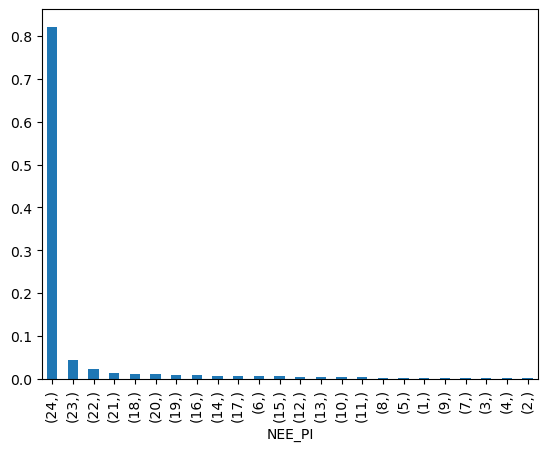

In [15]:
(tall_twr[columns]
 .groupby("TIMESTAMP_START")
 .count()
 .value_counts(normalize=True)
 .plot
 .bar())

In [16]:
tall_twr_combined = tall_twr[columns].groupby("TIMESTAMP_START").mean()
tall_twr_combined["std"] = tall_twr[columns].groupby("TIMESTAMP_START").std()

In [17]:
tall_twr_combined.rename(columns={"NEE_PI": "NEE_Tall_Tower_Mean",
                                  "std": "NEE_Tall_Tower_Std"},
                         inplace=True)
tall_twr_combined

NEE_Tall_Tower_Mean  NEE_Tall_Tower_Std
TIMESTAMP_START                                         
2001-01-01                  0.097849            1.260157
2001-01-02                 -0.138314            1.560571
2001-01-03                  0.187252            0.854632
2001-01-04                 -0.216071            0.931908
2001-01-05                  0.263717            0.502117
...                              ...                 ...
2021-12-26                  0.385272            0.225060
2021-12-27                  0.265939            1.678897
2021-12-28                  1.277565            6.973817
2021-12-29                 -2.318228            4.663228
2021-12-30                 -0.289852            2.712874

[7056 rows x 2 columns]

C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\1093391253.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\1093391253.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



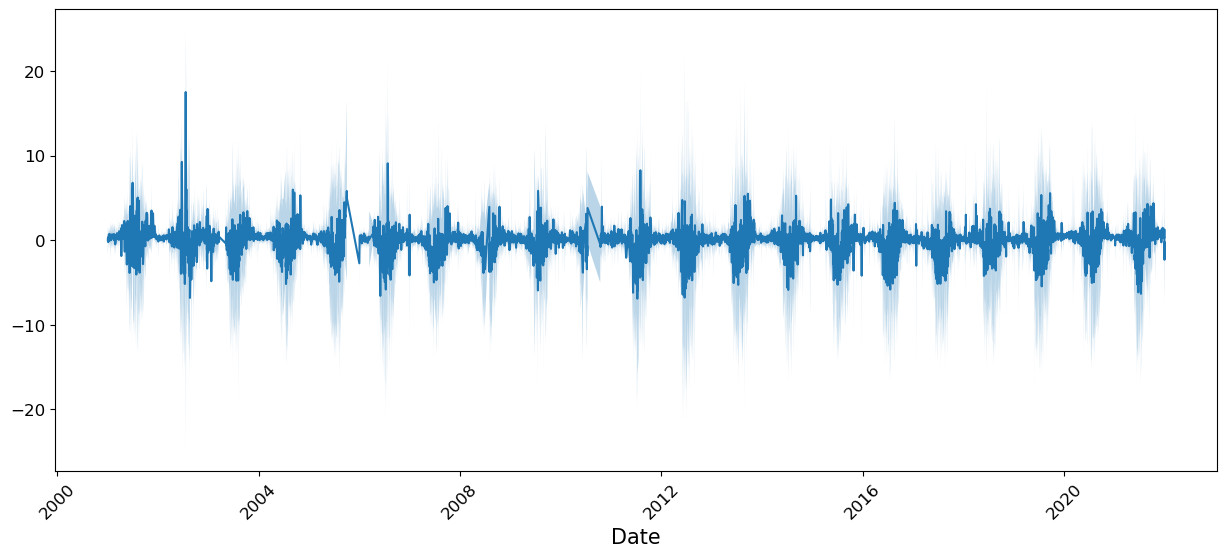

In [18]:
# NEE = Net Ecosystem Exchange
# PI = Provided by PI/tower team
# GPP = Gross Primary Productivity
f, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(tall_twr_combined.index, tall_twr_combined['NEE_Tall_Tower_Mean'])
ax.fill_between(tall_twr_combined.index, 
                 tall_twr_combined['NEE_Tall_Tower_Mean'] - tall_twr_combined['NEE_Tall_Tower_Std'], 
                 tall_twr_combined['NEE_Tall_Tower_Mean'] + tall_twr_combined['NEE_Tall_Tower_Std'], 
                 alpha=0.3)
#ax.set_xlim(datetime.fromisoformat("2021-01-01"), datetime.fromisoformat("2021-12-31"))
plt.grid(False)
plt.xlabel("Date", size=15)
ax.set_xticklabels(ax.get_xticklabels(), size="large", rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), size="large")
plt.show()

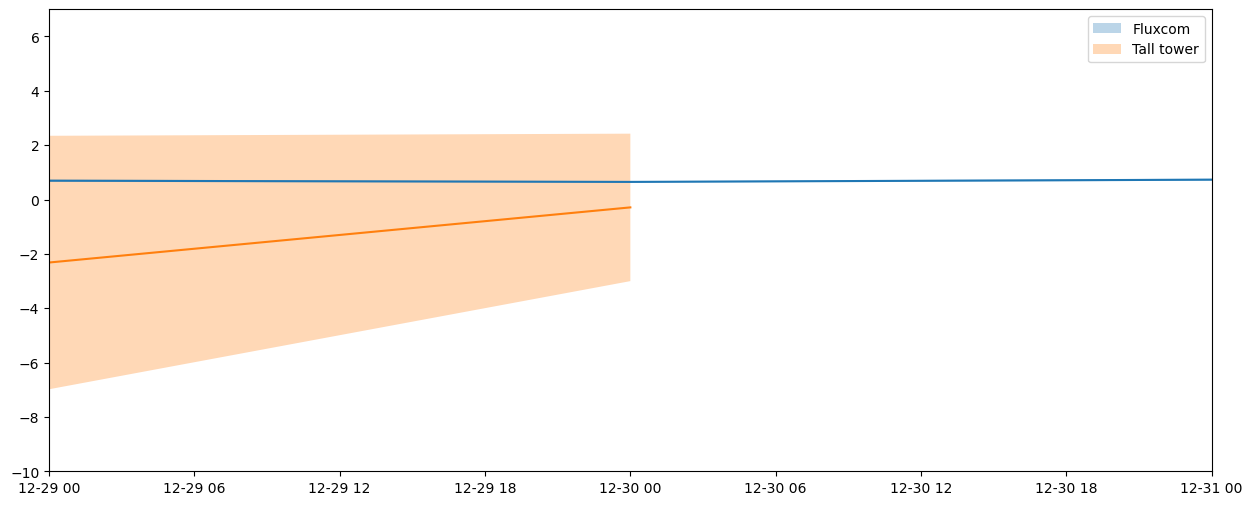

In [19]:
f, ax = plt.subplots(figsize=(15, 6))
plt.plot(fluxcom_NEE.index, fluxcom_NEE['NEE_Fluxcom_Mean'])
plt.fill_between(fluxcom_NEE.index, 
                 fluxcom_NEE['NEE_Fluxcom_Mean'] - fluxcom_NEE['NEE_Fluxcom_Std'], 
                 fluxcom_NEE['NEE_Fluxcom_Mean'] + fluxcom_NEE['NEE_Fluxcom_Std'], 
                 alpha=0.3,
                 label='Fluxcom')

plt.plot(tall_twr_combined.index, tall_twr_combined['NEE_Tall_Tower_Mean'])
plt.fill_between(tall_twr_combined.index, 
                 tall_twr_combined['NEE_Tall_Tower_Mean'] - tall_twr_combined['NEE_Tall_Tower_Std'], 
                 tall_twr_combined['NEE_Tall_Tower_Mean'] + tall_twr_combined['NEE_Tall_Tower_Std'], 
                 alpha=0.3,
                 label='Tall tower')
plt.xlim(pd.to_datetime("2021-12-29"), pd.to_datetime("2021-12-31"))
plt.ylim(-10, 7)
plt.grid(False)
plt.legend()

In [20]:
merged_data = fluxcom_NEE.merge(tall_twr_combined,
                         left_index=True,
                         right_index=True,
                         how='left',
                         validate="1:1")
merged_data

NEE_Fluxcom_Mean  NEE_Fluxcom_Std  NEE_Tall_Tower_Mean  \
2001-01-01          0.535896         0.032389             0.097849   
2001-01-02          0.534414         0.029303            -0.138314   
2001-01-03          0.532226         0.032866             0.187252   
2001-01-04          0.542712         0.027485            -0.216071   
2001-01-05          0.741287         0.032827             0.263717   
...                      ...              ...                  ...   
2021-12-27          0.727599         0.041631             0.265939   
2021-12-28          0.685764         0.046951             1.277565   
2021-12-29          0.692232         0.044501            -2.318228   
2021-12-30          0.647944         0.026612            -0.289852   
2021-12-31          0.729792         0.036029                  NaN   

            NEE_Tall_Tower_Std  
2001-01-01            1.260157  
2001-01-02            1.560571  
2001-01-03            0.854632  
2001-01-04            0.931908  
2001-01-05            0.502117  
...                        ...  
2021-12-27            1.678897  
2021-12-28            6.973817  
2021-12-29            4.663228  
2021-12-30            2.712874  
2021-12-31                 NaN  

[7670 rows x 4 columns]

Question: So after merging the data-> we have got back some na values in tall tower. It seems like dropping these values for visualization in the merged_data seems unnecessary as we would lose valuable data of fluxcom which can be plotted and help understand the trend in the data. However, for difference in both the data at a particular instant of time may need dropping the na values for accurate comparison.

In [21]:
# Check for null values in the entire DataFrame
null_values = merged_data.isnull().sum()
null_values

NEE_Fluxcom_Mean         0
NEE_Fluxcom_Std          0
NEE_Tall_Tower_Mean    614
NEE_Tall_Tower_Std     631
dtype: int64

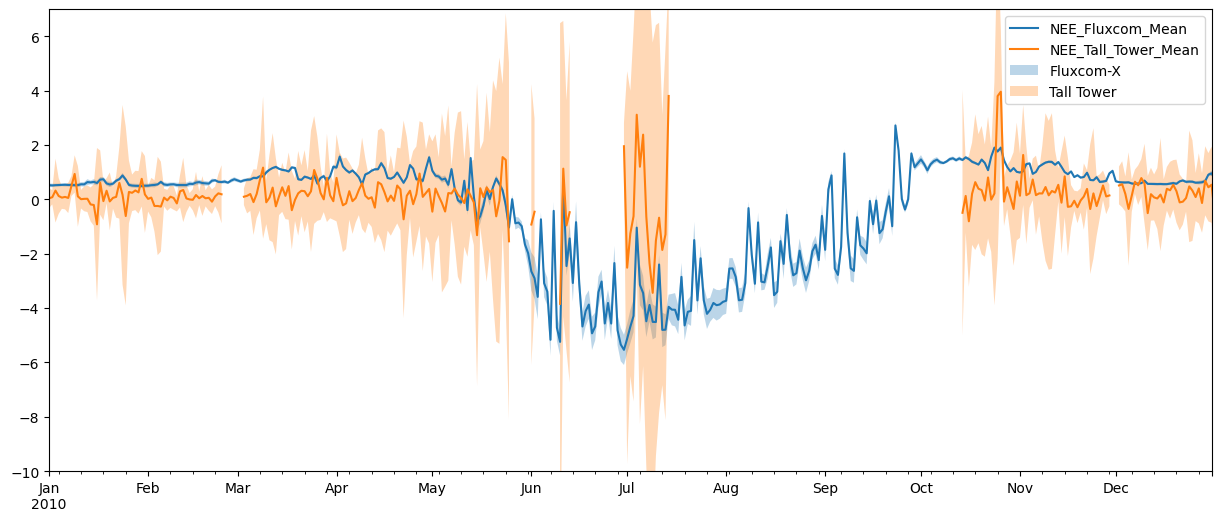

In [22]:
f, ax = plt.subplots(1, 1, figsize=(15, 6))

merged_data[["NEE_Fluxcom_Mean", "NEE_Tall_Tower_Mean"]].plot.line(ax=ax)
plt.fill_between(merged_data.index,
                 merged_data["NEE_Fluxcom_Mean"] - merged_data["NEE_Fluxcom_Std"],
                 merged_data["NEE_Fluxcom_Mean"] + merged_data["NEE_Fluxcom_Std"],
                 alpha=0.3,
                 label='Fluxcom-X')
plt.fill_between(merged_data.index,
                    merged_data["NEE_Tall_Tower_Mean"] - merged_data["NEE_Tall_Tower_Std"],
                    merged_data["NEE_Tall_Tower_Mean"] + merged_data["NEE_Tall_Tower_Std"],
                    alpha=0.3,
                    label='Tall Tower')
plt.xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2010-12-31"))
plt.ylim(-10, 7)
plt.grid(False)
plt.legend()

In [23]:
# Drop rows with NaN values only from the specified columns
merged_data_cleaned = merged_data.dropna(subset=['NEE_Fluxcom_Mean', 'NEE_Tall_Tower_Mean'])

# Calculate the absolute difference between the columns
merged_data_cleaned['absolute_difference'] = merged_data_cleaned['NEE_Fluxcom_Mean'] - merged_data_cleaned['NEE_Tall_Tower_Mean']

# Calculate the mean of the two columns
merged_data_cleaned['mean'] = (merged_data_cleaned['NEE_Fluxcom_Mean'] + merged_data_cleaned['NEE_Tall_Tower_Mean']) / 2

# Calculate the deviation percentage
merged_data_cleaned['deviation_percentage'] = (merged_data_cleaned['absolute_difference'] / merged_data_cleaned['mean']) * 100

# Calculate the mean deviation percentage
mean_deviation_percentage = merged_data_cleaned['deviation_percentage'].mean()

# Calculate the median deviation percentage
median_deviation_percentage = merged_data_cleaned['deviation_percentage'].median()

print("Mean Deviation Percentage:", mean_deviation_percentage)
print("Median Deviation Percentage:", median_deviation_percentage)


Mean Deviation Percentage: 229.9554396502354
Median Deviation Percentage: 84.66940674472619


C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\396630815.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\396630815.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\396630815.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\siddh\AppData\Local\Temp\ipykernel_18188\2885697717.py:26: UserWarning:

The figure layout has changed to tight



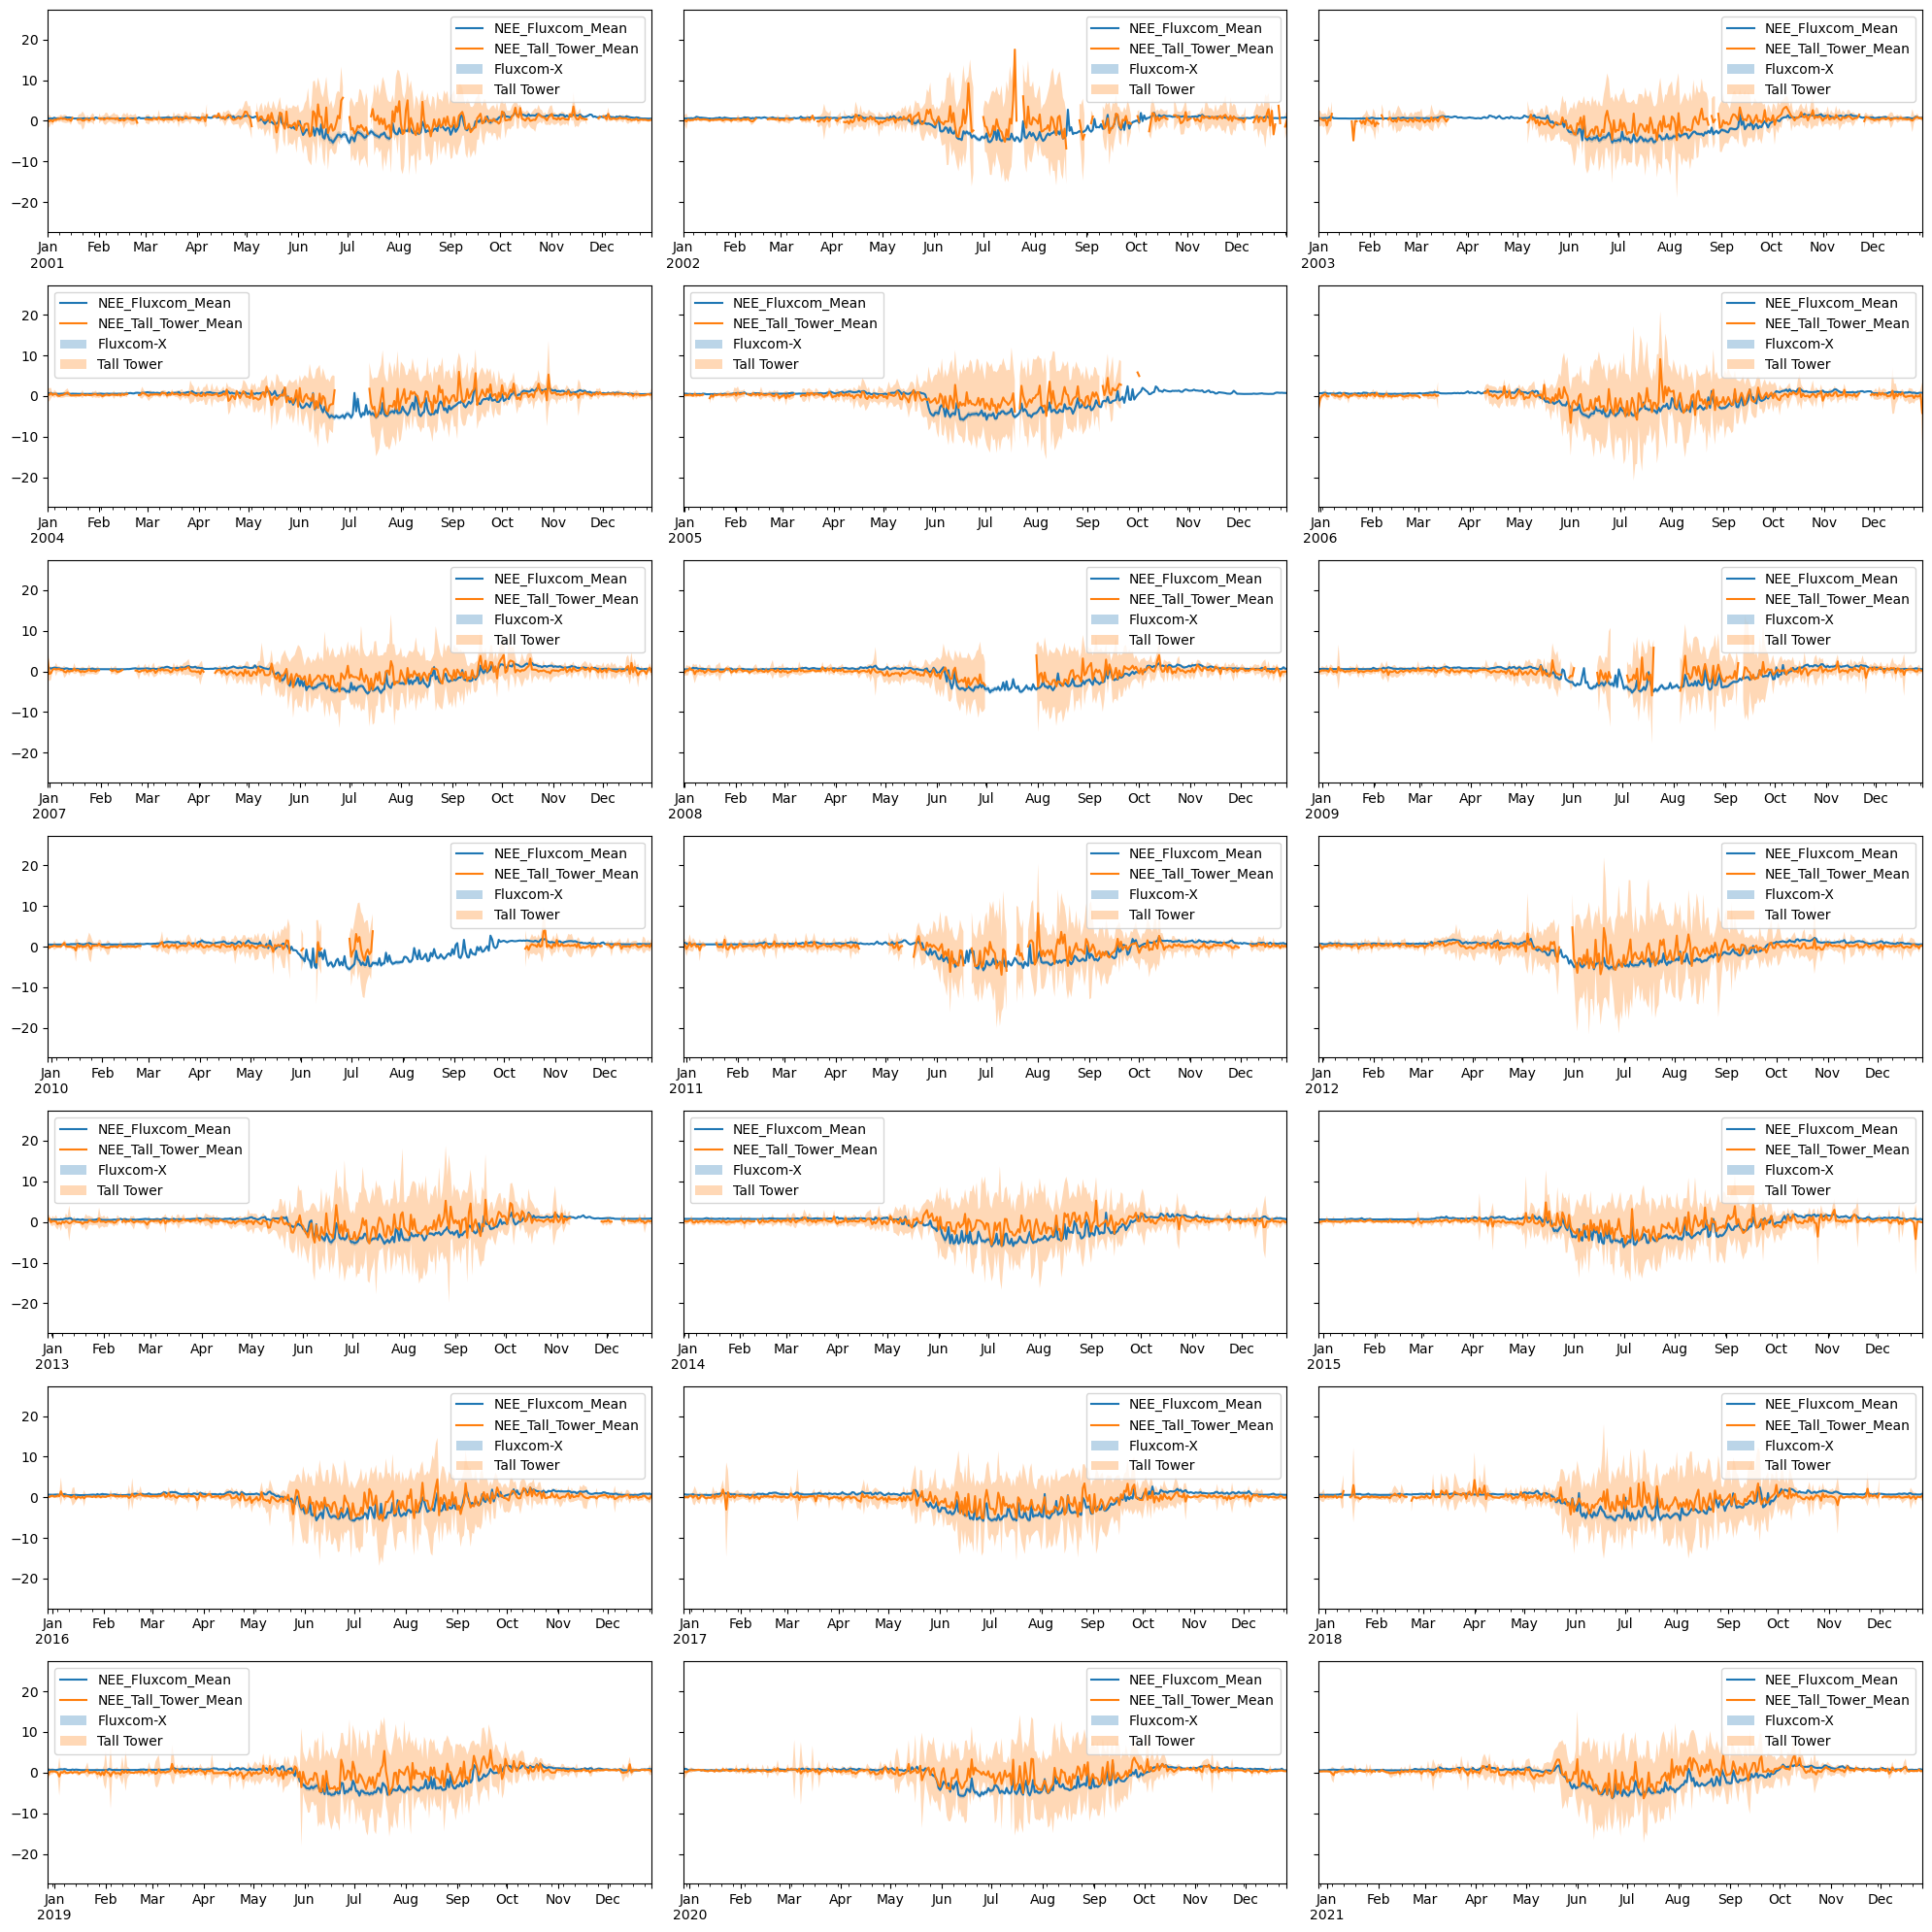

In [24]:
# Sample code for creating subplots
f, axs = plt.subplots(ncols=3, nrows=7, figsize=(20, 20), constrained_layout=True, sharey=True)

# Iterate over each subplot
for i, ax in enumerate(axs.flat):
    # Calculate the start and end index for each year
    start_index = i * 365
    end_index = (i + 1) * 365 if (i + 1) * 365 <= len(merged_data) else len(merged_data)
    
    # Plot data on each subplot for the corresponding year
    merged_data.iloc[start_index:end_index][["NEE_Fluxcom_Mean", "NEE_Tall_Tower_Mean"]].plot.line(ax=ax)
    ax.fill_between(merged_data.iloc[start_index:end_index].index,
                     merged_data.iloc[start_index:end_index]["NEE_Fluxcom_Mean"] - merged_data.iloc[start_index:end_index]["NEE_Fluxcom_Std"],
                     merged_data.iloc[start_index:end_index]["NEE_Fluxcom_Mean"] + merged_data.iloc[start_index:end_index]["NEE_Fluxcom_Std"],
                     alpha=0.3,
                     label='Fluxcom-X')
    ax.fill_between(merged_data.iloc[start_index:end_index].index,
                    merged_data.iloc[start_index:end_index]["NEE_Tall_Tower_Mean"] - merged_data.iloc[start_index:end_index]["NEE_Tall_Tower_Std"],
                    merged_data.iloc[start_index:end_index]["NEE_Tall_Tower_Mean"] + merged_data.iloc[start_index:end_index]["NEE_Tall_Tower_Std"],
                    alpha=0.3,
                    label='Tall Tower')
    ax.grid(False)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()



In [25]:
'''Code used for extracting desired location from Fluxcom-X

data=xr.open_dataset(Path(r"C:\Users\siddh\Downloads\NEE\Daily\NEE_2021_025_daily.nc"))

# Define the coordinates for the CHEESEHEAD domain box
ul_lat, ul_lon = 46.07822, -90.47257  # Upper left
ur_lat, ur_lon = 46.07877, -90.08820  # Upper right
ll_lat, ll_lon = 45.81086, -90.47448  # Lower left
lr_lat, lr_lon = 45.81167, -90.08792  # Lower right


def select_closest_point(values: list[float], value: float):
    return min(values, key=lambda x: abs(x - value))


lats = list(set(map(lambda x: select_closest_point(data.lat.values, x),
                    [ul_lat, ur_lat, ll_lat, lr_lat])))

lons = list(set(map(lambda x: select_closest_point(data.lon.values, x),
                    [ul_lon, ur_lon, ll_lon, lr_lon])))

lats = [i for i in data.lat.values if min(lats) <= i <= max(lats)]
lons = [i for i in data.lon.values if min(lons) <= i <= max(lons)]

# Select data within the latitude and longitude ranges
ds = data.sel(lon=lons, lat=lats)
ds

# To netcdf

ds.to_netcdf("NEE_2021_025_daily_subset.nc")

##Kegonsa site##

# Define the latitude and longitude in degrees, minutes, and seconds

keg_latitude = 42 + 57/60 + 27.4/3600  # 42°57'27.4"N
keg_longitude = -(89 + 17/60 + 33.0/3600)  # 89°17'33.0”W (Negative for W)
print(keg_latitude,keg_longitude)

# Selecting nearest location

data2=data.sel(lat=keg_latitude, lon=keg_longitude, method='nearest')

# To netCDF

data2.to_netcdf('NEE_2021_025_daily_kegonsa.nc')
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 88-89: truncated \UXXXXXXXX escape (1619830072.py, line 48)